# Простейшая система с продукционными правилами на базе Drools

Пример простой системы основанной на правилах с использованием фреймворка Drools. Решается задача определения связи между произвольными вершинами ориентированного графа на множестве вершин и ребер. Исходными данными являются соединения отдельных точек (ребра графа A1-A2, A2-A3, A3-A4 и т.д.).


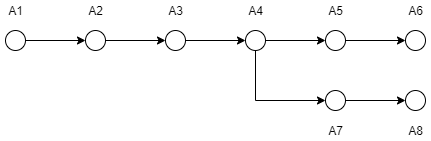

В результате работы системы выводятся дополнительные соединения более высокого порядка (A1-A6, A1-A8, A2-A6 и т.д.). Например, объединяя факты о соединения A1 с A2 и A2 с A3 можно получить новый факт, описывающий соединение A1 с A3.

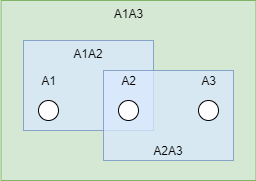

Совокупность новых фактов, сгенерированных из исходных, позволяет, например, отвечать на вопросы следующего вида - "Можно ли пройти по графу между вершинами A1 и A6?".

Ниже приводится программный код примера, состоящий из блока настройки окружения для сборки, инструкций по сборке, оболочки системы на языке Java, описания правил и запросов на языке Drools.
В заключении приводится результат логического вывода программы.

## 1. Определяем вспомогательные функции для запуска программ.

In [ ]:
def run(cmd):
  print('>> {}'.format(cmd))
  !{cmd}  
  print('')

## 2. Настройка окружения для сборки и запуска java-программ

In [ ]:
import os

run('apt-get update > /dev/null')
run('apt-get upgrade > /dev/null')

run('apt-get install openjdk-11-jdk > /dev/null')

run('apt-get install maven > /dev/null')

run('javac -version')
run('mvn -version')

>> apt-get update > /dev/null

>> apt-get upgrade > /dev/null
Extracting templates from packages: 100%

>> apt-get install openjdk-11-jdk > /dev/null

>> apt-get install maven > /dev/null
Extracting templates from packages: 100%

>> javac -version
javac 11.0.11

>> mvn -version
Apache Maven 3.6.0
Maven home: /usr/share/maven
Java version: 11.0.11, vendor: Ubuntu, runtime: /usr/lib/jvm/java-11-openjdk-amd64
Default locale: en_US, platform encoding: UTF-8
OS name: "linux", version: "5.4.104+", arch: "amd64", family: "unix"



##3. Создаем необходимые директории.

In [ ]:
run('rm -Rv src')
run('mkdir -p src/main/java/org/etu/apu/intelisys/practice/ex2')
run('mkdir -p src/main/resources/org/etu/apu/intelisys/practice/ex2')
run('mkdir -p src/main/resources/META-INF/')

>> rm -Rv src
rm: cannot remove 'src': No such file or directory

>> mkdir -p src/main/java/org/etu/apu/intelisys/practice/ex2

>> mkdir -p src/main/resources/org/etu/apu/intelisys/practice/ex2

>> mkdir -p src/main/resources/META-INF/



##4. Описываем инструкцию по сборке простого java-приложения

In [ ]:
%%writefile pom.xml
<project xmlns="http://maven.apache.org/POM/4.0.0" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://maven.apache.org/POM/4.0.0 http://maven.apache.org/xsd/maven-4.0.0.xsd">
    <modelVersion>4.0.0</modelVersion>

    <parent>
        <groupId>org.springframework.boot</groupId>
        <artifactId>spring-boot-starter-parent</artifactId>
        <version>2.5.6</version>
        <relativePath/> <!-- lookup parent from repository -->
    </parent>

    <groupId> org.etu.apu.intelisys.practice.ex2</groupId>
    <artifactId>ex2-drools</artifactId>
    <properties>
        <maven.compiler.source>1.8</maven.compiler.source>
        <maven.compiler.target>1.8</maven.compiler.target>
        <drools-version>7.60.0.Final</drools-version>
    </properties>
    <version>0.0.1-SNAPSHOT</version>


	<dependencies>

        <dependency>
            <groupId>org.springframework.boot</groupId>
            <artifactId>spring-boot-starter</artifactId>
        </dependency>

        <dependency>
            <groupId>org.kie.kogito</groupId>
            <artifactId>kogito-rules-spring-boot-starter</artifactId>
            <version>1.12.0.Final</version>
        </dependency>
        
        <dependency>
            <groupId>org.kie</groupId>
            <artifactId>kie-api</artifactId>
            <version>${drools-version}</version>
        </dependency>

        <dependency>
            <groupId>org.drools</groupId>
            <artifactId>drools-compiler</artifactId>
            <version>${drools-version}</version>
        </dependency>
        <dependency>
            <groupId>org.drools</groupId>
            <artifactId>drools-core</artifactId>
            <version>${drools-version}</version>
        </dependency>

        <dependency>
            <groupId>org.drools</groupId>
            <artifactId>drools-mvel</artifactId>
            <version>${drools-version}</version>
        </dependency>

	</dependencies>

    <build>
        <plugins>
            <plugin>
                <groupId>org.kie</groupId>
                <artifactId>kie-maven-plugin</artifactId>
                <version>7.60.0.Final</version>
                <extensions>true</extensions>
            </plugin>
<!--
            <plugin>
                <groupId>org.apache.maven.plugins</groupId>
                <artifactId>maven-shade-plugin</artifactId>
                <version>1.6</version>
                <executions>
                    <execution>
                        <phase>package</phase>
                        <goals>
                            <goal>shade</goal>
                        </goals>
                        <configuration>
                            <transformers>
                            <transformer implementation="org.apache.maven.plugins.shade.resource.AppendingTransformer">
                                <resource>META-INF/kie.conf</resource>
                            </transformer>
                            </transformers>
                        </configuration>
                    </execution>
                </executions>
            </plugin>
            -->
        </plugins>
    </build>
</project>

Writing pom.xml


In [ ]:
%%writefile src/main/resources/META-INF/kmodule.xml
<kmodule xmlns="http://www.drools.org/xsd/kmodule"/>

Writing src/main/resources/META-INF/kmodule.xml


## 5. Подготавливаем файлы с исходным кодом на языке java.

In [ ]:
%%writefile src/main/java/org/etu/apu/intelisys/practice/ex2/Path.java

package org.etu.apu.intelisys.practice.ex2;

public class Path {
    private String from;
    private String to;

    public void setFrom(String fromName) {
        from = fromName;
    }

    public String getFrom() {
        return from;
    }

    public void setTo(String toName) {
        to = toName;
    }

    public String getTo() {
        return to;
    }

    public Path(String from, String to) {
        this.from = from;
        this.to = to;
    }

    public Path() {
        from = null;
        to = null;
    }

    public String toString() {
        return "(" + from + ", " + to + ")";
    }

}

Writing src/main/java/org/etu/apu/intelisys/practice/ex2/Path.java


In [ ]:
%%writefile src/main/java/org/etu/apu/intelisys/practice/ex2/AppWithRules.java

package org.etu.apu.intelisys.practice.ex2;

import java.io.IOException;
import java.io.InputStream;
import java.io.InputStreamReader;
import java.io.Reader;

import org.kie.api.runtime.KieSession;
import org.kie.api.KieServices;
import org.kie.api.runtime.KieContainer;
import org.kie.api.runtime.rule.QueryResults;
import org.kie.api.runtime.rule.QueryResultsRow;

import org.etu.apu.intelisys.practice.ex2.Path;


public class AppWithRules {
    public static void main(String[] args) throws IOException {
		AppWithRules drools = new AppWithRules();
		drools.executeDrools();
	}


	public void executeDrools() throws IOException {
		  
		KieServices kieService = KieServices.Factory.get();
		
		KieContainer kContainer =  kieService.getKieClasspathContainer();

		KieSession session = kContainer.newKieSession();

		Path[] switchArray = {
			new Path("A1", "A2"),
			new Path("A2", "A3"),
			new Path("A3", "A4"),
			new Path("A4", "A5"),
			new Path("A5", "A6"),
			new Path("A3", "A7"),
			new Path("A7", "A8")
		};	
		
		for(Path it: switchArray ) {
			session.insert(it);
		}

		System.out.println("===== Активация всех правил =====");
		session.fireAllRules();

		System.out.println("===== Задаем вопрос системе \"Можно ли пройти из точки A1 в точку A6?\" =====");
		QueryResults result = session.getQueryResults("Check path", new String("A1"), new String("A6"));
		System.out.println("Число найденых результатов: " + result.size());
		for(QueryResultsRow res: result) {
			  System.out.println("Найденый факт:" + res.get("result").toString());
		}
    }

	public static void print(String str) {
		  System.out.println(str);
	}
}

Writing src/main/java/org/etu/apu/intelisys/practice/ex2/AppWithRules.java


In [ ]:
%%writefile src/main/resources/org/etu/apu/intelisys/practice/ex2/rules.drl
package org.etu.apu.intelisys.practice.ex2;

import function org.etu.apu.intelisys.practice.ex2.AppWithRules.print
import org.etu.apu.intelisys.practice.ex2.Path

rule "Make connection"
	when 
		$from: Path()
		$to: Path(from == $from.getTo())
		not Path(from == $from.getFrom(), to == $to.getTo())
  	then
	  	print("New path (" + $from.getFrom() + ", " 
		        + $to.getTo() + ") from (" + $from.getFrom() + ", " + $from.getTo() + ") => (" + $to.getFrom() + ", " + $to.getTo() + ")." );
		insert(new Path($from.getFrom(), $to.getTo()));
	end

query "Check path" (start, end)
	result: Path(from == start, to == end)
end



Writing src/main/resources/org/etu/apu/intelisys/practice/ex2/rules.drl


##6. Сборка и запуск приложения

In [ ]:
run('mvn package spring-boot:run')

См. результат логического вывода см. выше.